In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 10.1.3 퍼셉트론

perceptron은 가장 간단한 인공 신경망 구조 중 하나 -> TLU(threshold logic unit) 또는 LTU(linear threshold unit)라고 불리는 조금 다른 형태의 인공 뉴런을 기반으로 함

입력과 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있음

TLU: 입력의 가중치 합을 계산($ z = w_1x_1 + w_2x_2 + ... + w_nx_n = x^Tw $)한 뒤 계산된 합에 `계단 함수(step function)`를 적용하여 결과를 출력
## $$ 출력 = h_w(x) = step(z) = step(x^Tw) $$

- 계단함수의 예
    - heavyside step function(unit step function)
    - sign function

TLU를 훈련한다는 것 = w0, w1, w2, ...를 찾는다는 것

- 퍼셉트론: 층이 하나뿐인 TLU. 각 TLU는 모든 입력에 연결되어 있음
    - 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 -> fully connected layer 또는 dense layer
---
fully connected layer의 출력 계산
## $$ h_{W,b(X) = ϕ(XW + b)} $$

- X: 입력 특성의 행렬(행: 샘플, 열: 특성)
- W: 가중치 행렬. 편향을 제외한 모든 연결 가중치
- b: 편향 벡터
- ϕ: 활성화 함수(인공 뉴런이 TLU일 경우 이 함수는 step function임)
---
퍼셉트론은 어떻게 훈련될까?

헤브의 규칙(Hebb's rule)에서 영감을 받음 -> 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 강해진다는 제안

퍼셉트론은 예측할 때 만드는 오차를 반영하도록 조금 변형된 규칙을 사용하여 훈련됨 -> 퍼셉트론 학습 규칙은 오차가 감소되도록 연결을 강화시킴
- 퍼셉트론 학습 규칙(가중치 업데이트)
## $$ w_{i, j}^{(next step)} = w_{i, j} + η(y_j - \hat{y}_j)x_i $$
- $ w_{i, j} $: i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치
- $ x_i $: 현재 훈련 샘플의 i번째 뉴런의 입력값
- $ \hat{y}_j $: 현재 훈련 샘플의 j번째 출력 뉴런의 출력값
- $ y_j $: 현재 훈련 샘플의 j번째 출력 뉴런의 타깃값
- $ η $: 학습률

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

'''
sklearn의 perceptron은
loss='perceptron', learning_rate='constant', eta0=1, penalty=None
인 SGDClassifier와 같음
'''
# 로지스틱 회귀와 달리 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만듦
# 이런 이유로 퍼셉트론보다 로지스틱 회귀를 선호함

# 퍼셉트론(단층)은 여러 심각한 약점이 있음(특히 XOR 분류 문제를 풀지 못함)
# 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있음 -> 다층 퍼셉트론(MLP) -> XOR 문제 풀 수 있음

"\nsklearn의 perceptron은\nloss='perceptron', learning_rate='constant', eta0=1, penalty=None\n인 SGDClassifier와 같음\n"

In [4]:
y_pred

array([1], dtype=int32)

Saving figure perceptron_iris_plot


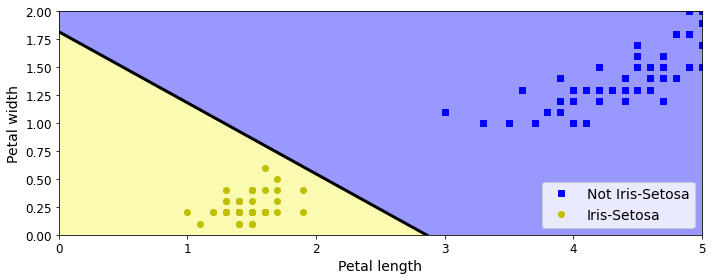

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

논리회로: https://terms.naver.com/entry.naver?docId=5741231&cid=60217&categoryId=60217

퍼셉트론: https://wikidocs.net/24958

### 10.1.4 다층 퍼셉트론과 역전파

다층 퍼셉트론은 입력층, `은닉층`, 출력층으로 구성됨

입력층에 가까운 층을 하위 층(lower layer), 출력층에 가까운 층을 상위 층(upper layer)이라고 함

출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결되어 있음

---

은닉층을 여러 개 쌓아 올린 인공 신경망을 `심층 신경망(deep neural network, DNN)`이라고 함

---

연구자들은 다층 퍼셉트론을 훈련할 방법을 찾기 위해 오랫동안 노력했지만 실패함 -> 하지만 `역전파(backpropagation)` 훈련 알고리즘을 소개하는 획기적인 논문이 나옴 -> 이 알고리즘은 효율적인 기법으로 그레디언트를 계산하는 경사 하강법임

- 역전파
1. input을 넣고 쭉 계산하는데 역방향 계산을 위해 중간 계산값을 모두 저장해야 함
2. 출력 오차 측정(손실 함수로 기대하는 출력과 실제 출력을 비교하고 오차 측정 값을 반환)
3. 각 출력 연결이 이 오차에 기여하는 정도(gradient)를 계산(chain rule)을 적용하면 빠르고 정확하게 계산 가능)
    - 신경망을 통과하면서 만들어진 굉장히 복잡한 고차원의 합성함수의 기울기(gradient)를 계산하기 위해서는 미분의 연쇄 법칙을 활용해야 함
    - 합성함수의 기울기를 계산하려면 이전 함수의 미분값(오차에 기여하는 정도)이 필요 -> 이전 함수의 미분값을 구하기 위해선 이전 함수의 이전 함수의 미분값이 필요 -> ... -> 이렇게 미분의 연쇄법칙의 계산을 따라 뒤에서부터 하나씩 계산하기 때문에 `역전파`
4. 이렇게 구한 모든 오차 그레디언트를 이용해 모든 연결 가중치를 수정
> 은닉층의 연결 가중치를 랜덤하게 초기화하는 것이 중요! -> 모든 가중치와 편향을 같은 값으로 초기화하면 모든 뉴런이 완전히 같아지면서 역전파해도 모든 뉴런이 동일하게 바뀌겠지(하나의 뉴런인 것처럼 행동하겠지)

---

논문 저자들은 위 알고리즘이 잘 작동하게 다층 퍼셉트론 구조에 중요한 변화를 줌 -> 활성화 함수를 바꿈

- 시그모이드 함수
## $$ σ(z) = \frac{1}{1+e^{-z}} $$

- 하이퍼볼릭 탄젠트 함수(쌍곡 탄젠트 함수)
## $$ tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{e^x-e^{-x}}{e^x+e^{-x}} $$
    - $ sinh(x) = \frac{e^x-e^{-x}}{2} $
    - $ cosh(x) = \frac{e^x+e^{-x}}{2} $
    - $(cosh(x), sinh(x))$는 쌍곡선 $ x^2 - y^2 = 1 $을 그림


- ReLU 함수(Rectified Linear Unit)
## $$ ReLU(z) = max(0, z) $$

> 활성화 함수가 왜 필요? -> 선형 변환을 여러 개 연결해도 선형 변환일 뿐임 -> 예) f = 2x+1, g = 3x -> f(g) = 6x+1 -> 따라서 층 사이에 비선형성을 추가하지 않으면 아무리 층을 많이 쌓아도 하나의 층과 동일해짐 -> 이런 층으로는 복잡한 문제를 풀 수 없음 -> 비선형 활성화 함수가 있는 충분히 큰 신경망은 이론적으로 어떤 연속 함수도 근사할 수 있음

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


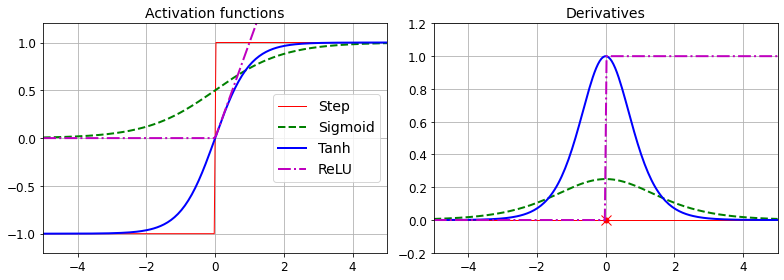

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

### 10.1.5 회귀를 위한 다층 퍼셉트론

일반적으로 회귀용 다층 퍼셉트론을 만들 때
- 출력층의 활성화 함수: 없음. 또는 출력이 양수일 때 ReLU/softplus, 출력을 특정 범위로 제한할 때 sigmoid/tanh
- 손실 함수: 평균 제곱 오차, 이상치가 있다면 평균 절댓값 오차

### 10.1.6 분류를 위한 다층 퍼셉트론

일반적으로 분류용 다층 퍼셉트론을 만들 때

|하이퍼파라미터|이진 분류|다중 레이블 분류(어떤 메일이 스팸 메일인지? 동시에 긴급 메일인지? -> 각각에 대한 확률이 필요)|다중 분류(3개 이상의 클래스 중 한 클래스에만 속할 수 있을 때. 예) 숫자 이미지 분류)|
|-|-|-|-|
|출력 뉴런 수|1개(0과 1 사이의 실수 = 양상 클래스에 대한 예측 확률)|레이블마다 1개|클래스마다 1개(출력층에 softmax function 사용 -> 1일 확률, 2일 확률, ... -> 전체 확률의 합 = 1)|
|출력층의 활성화 함수|sigmoid|sigmoid|sigmoid|
|손실 함수(확률 분포를 예측해야 하므로 일반적으로 크로스 엔트로피 사용)|크로스 엔트로피|크로스 엔트로피|크로스 엔트로피|

## 10.2 케라스로 다층 퍼셉트론 구현하기

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.__version__

'2.9.1'

In [10]:
keras.__version__

'2.9.0'

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

먼저 데이터셋을 적재해야 함.

여기선 Fashion MNIST로 함(10개의 클래스로 이루어진 28*28 픽셀 크기의 흑백 이미지 70000개인 MNIST와 형태가 같지만 패션 아이템을 나타냄 -> 클래스마다 샘플이 더 다양하므로 훨씬 어려운 문제임)

#### 케라스를 사용하여 데이터셋 적재하기

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train_full.shape # 28*28 크기의 배열 60000개

(60000, 28, 28)

In [13]:
X_train_full.dtype # uint8: 8비트의 부호 없는 정수형

dtype('uint8')

In [14]:
# validation set 만들기
# 경사 하강법을 사용할 것이므로 입력 특성의 스케일 조정하기(간편하게 255.0으로 나누기)

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

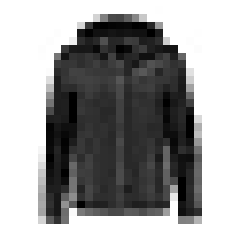

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# 클래스 이름의 리스트 만들기

In [19]:
class_names[y_train[0]]

'Coat'

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


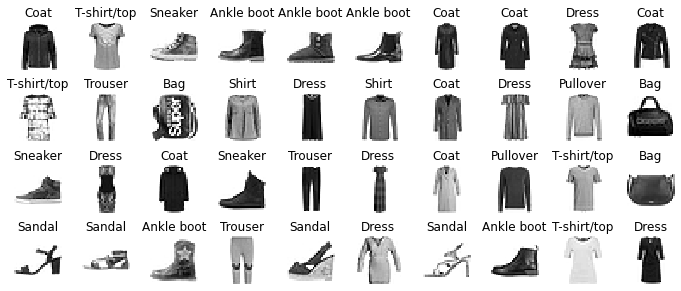

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# 패션 MNIST의 샘플

#### 시퀀셜 API를 사용하여 모델 만들기

Keras 에서는 신경망 모델을 만드는 방식 중 하나인 Seqential Model을 제공함. 이는 순차적으로 layer를 더해나가는 방식

In [23]:
# 신경망 만들기

model = keras.models.Sequential() # 시퀀셜 모델 만듦

# 입력 이미지를 1D 배열로 변환하는 층(fully connected layer에 전달하기 위해). 어떤 모델 파라미터도 없고 그냥 전처리만 함
# 첫 번째 층이므로 input_shape를 지정해야 함(따로 지정해줘도 되고). 배치 크기를 제외하고 샘플의 크기만 써야 함
# keras.layers.InputLayer(input_shape=) 이렇게 할 수도 있음
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 뉴런 300개, 뉴런 100개인 Dense 은닉층을 추가
# Dense층마다 각자 가중치 행렬을 관리함 -> 이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함됨
# 또한 뉴런마다 하나씩 있는 편향도 벡터로 관리함
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

# 마지막으로 뉴런 10개짜리 Dense 출력층을 추가함
model.add(keras.layers.Dense(10, activation='softmax'))

Metal device set to: Apple M1


2022-08-25 13:17:59.726645: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-25 13:17:59.726797: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
# 위 과정처럼 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 list를 전달해도 됨
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#### keras.io의 예제 코드 사용하기

In [26]:
from keras.layers import Dense
output_layer = Dense(10)

In [27]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [28]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [29]:
from tensorflow.keras import layers
output_layers = layers.Dense(10)

----

In [30]:
model.summary()

# Output Shape의 None: 배치 크기에 어떤 값도 가능하다는 뜻

# 235500 = 784 * 300 + 300 -> 파라미터 수 많음 -> 훈련 데이터를 학습하기 충분한 유연성을 가짐 = 과대적합의 위험을 가짐
# 784 * 300 = 연결 가중치
# 300 = 편향

# Trainable params: 훈련되는 파라미터
# Non-trainable params: 훈련되지 않는 파라미터

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers

In [32]:
model.layers[0]

In [33]:
hidden1 = model.layers[1] # 인덱스로 층 선택
hidden1.name # 층의 이름

'dense'

In [34]:
model.get_layer(hidden1.name) # 이름으로 층 선택

In [35]:
model.get_layer(hidden1.name) is hidden1

True

In [36]:
weights, biases = hidden1.get_weights() # 층의 모든 파라미터 접근

In [37]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

위 hidden1의 weights와 biases -> 대칭성을 깨기 위해 weights는 무작위로 초기화됨. biases는 0으로 초기화됨

다른 초기화 방법을 사용하고 싶다면 층을 만들 때 kernel_initializer(연결 가중치 행렬의 다른 이름이 커널)와 bias_initializer 매개변수를 설정하면 됨

#### 모델 컴파일

모델을 만들고 나서 complile() 메서드를 호출하여 사용할 손실 함수와 옵티마이저를 지정해야 함

> 옵티마이저: 일반적으로는 Optimizer라고 합니다. 뉴럴넷의 가중치를 업데이트하는 알고리즘이라고 생각하시면 이해가 간편하실 것 같습니다. 가중치를 업데이트하는 방법은 경사하강법에서 생기는 여러가지 단점을 극복하기 위해 다양한 알고리즘이 제안되었습니다.

![](./images/optimizer.png)

참고: https://wikidocs.net/152765

In [41]:
model.compile(loss='sparse_categorical_crossentropy', # loss=keras.losses.sparse_categorical_crossentropy와 동일
             optimizer='sgd', # optimizer=keras.optimizers.SGD()와 동일
             metrics=['accuracy']) # metrics=[keras.metrics.sparse_categorical_accuracy]와 동일

- sparse categorical cross entropy: 레이블이 정수 하나로 이루어져 있고 클래스가 배타적일 때 사용
- categorical cross entropy: 샘플마다 클래스 별 타깃 확률을 가지고 있을 때 사용
- binary cross entropy: 이진 분류나 다중 레이블 이진 분류일 때 사용(출력층에 softmax 대신 sigmoid 사용)

---

- sgd optimizer를 사용할 땐 학습률을 튜닝하는 것이 중요함 -> optimizer=keras.optimizers.SGD(lr=???) -> 기본값: lr=0.01

In [42]:
# 모델 훈련

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # validation_data=0.1처럼 비율을 지정할 수도 있음

Epoch 1/30


2022-08-25 13:18:00.244155: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   9/1719 [..............................] - ETA: 10s - loss: 2.3380 - accuracy: 0.1979 

2022-08-25 13:18:00.455216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7236 - accuracy: 0.7647

2022-08-25 13:18:10.333102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 11s 6ms/step - loss: 0.7236 - accuracy: 0.7647 - val_loss: 0.5201 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4841 - accuracy: 0.8319 - val_loss: 0.4353 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4390 - accuracy: 0.8459 - val_loss: 0.5353 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4121 - accuracy: 0.8564 - val_loss: 0.3921 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3936 - accuracy: 0.8620 - val_loss: 0.3748 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3748 - accuracy: 0.8679 - val_loss: 0.3710 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3630 - accuracy: 0.8713 - val_loss: 0.3632 - val_accuracy: 0.8

#### 위 결과에서 알 수 있는 것

모델 훈련을 위해 fit() 메서드를 사용 -> 입력 특성(X_train), 타깃 클래스(y_train), 훈련할 에포크 횟수(기본값은 1)를 전달함

추가로 검증 셋도 전달했음(이건 선택 사항임) -> 케라스는 에포크가 끝날 때마다 검증 셋을 사용해 손실(val_loss)과 추가적인 측정 지표(val_accuracy)를 계산함

만약 accuracy(훈련 셋 성능) >> val_accuracy(검증 셋 성능): 훈련 셋에 과대적합 되었구나(또는 버그가 있구나)라고 알 수 있겠지

하지만 위 결과에서는 큰 차이가 없음 -> 과대적합이 아닌 것 같음

---
훈련 세트의 편중(어떤 클래스는 많이 등장하고 어떤 클래스는 적게 등장)되어 있다면 -> fit() 메서드 호출 시 class_weight 매개변수를 지정하는 것이 좋음 -> 적게 등장하는 클래스는 높은 가중치를 부여하고 많이 등장하는 클래스는 낮은 가중치를 부여함

샘플별로 가중치를 부여하고 싶다면 sample_weight 매개변수를 지정함

둘 다 지정되면 케라스는 두 값을 곱하여 사용함

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [72]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [45]:
history.history

{'loss': [0.7236449122428894,
  0.484108567237854,
  0.4389530420303345,
  0.4121241867542267,
  0.3936093747615814,
  0.37482479214668274,
  0.3629542589187622,
  0.351607084274292,
  0.3412340581417084,
  0.33190688490867615,
  0.32399505376815796,
  0.3146167993545532,
  0.307855486869812,
  0.30190348625183105,
  0.2944185733795166,
  0.2889879047870636,
  0.28364285826683044,
  0.27740582823753357,
  0.272667795419693,
  0.2669990658760071,
  0.26238125562667847,
  0.2573927938938141,
  0.2533816695213318,
  0.2484557181596756,
  0.24401681125164032,
  0.2406187206506729,
  0.2361971139907837,
  0.23267200589179993,
  0.22820401191711426,
  0.22504089772701263],
 'accuracy': [0.7646545171737671,
  0.8318727016448975,
  0.8458545207977295,
  0.8564181327819824,
  0.8619999885559082,
  0.8678727149963379,
  0.8712545037269592,
  0.8750545382499695,
  0.8787636160850525,
  0.8823272585868835,
  0.8833999633789062,
  0.8867454528808594,
  0.8890363574028015,
  0.8914908766746521,
  0.

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


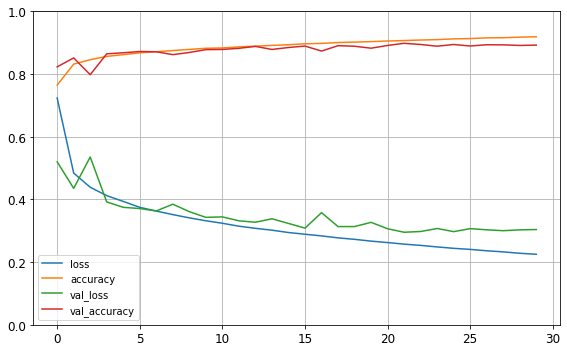

In [47]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

# 학습 곡선(keras learning curves)
# accuracy와 val_accuracy가 가까움 -> 과대적합되지 않았구나

# 훈련 초기에는 훈련 셋에서보다  검증 셋에서 성능이 더 좋네?
# 아님!! -> 검증 손실은 에포크가 끝난 후에 계산됨 / 훈련 손실은 에포크가 진행되는 동안 계산됨
# 따라서 훈련 곡선은 에포크의 절반만큼 왼쪽으로 이동해야 함

- 일반적으로 충분히 오래 훈련하면 훈련 셋의 성능이 검증 셋의 성능을 앞지름
- 검증 손실이 여전히 감소한다면 모델이 아직 완전히 수렴되지 않았다고 볼 수 있음 -> 아마 훈련을 계속 해야 할 것임 -> fit()을 다시 호출하면 중지되었던 곳에서부터 훈련을 이어갈 수 있음

---

#### 모델 성능이 만족스럽지 않다면? -> 처음으로 돌아가서 하이퍼파라미터 튜닝하기
1. 맨 처음 확인할 것은 학습률
2. 학습률이 도움이 되지 않으면 다른 옵티마이저를 테스트해보기
3. 층 개수, 층에 있는 뉴런 개수, 은닉층이 사용하는 활성화 함수 튜닝
4. 배치 크기 등

---

#### 모델 성능이 만족스럽다면?
모델을 상용 환경으로 배포하기 전에 테스트 셋으로 모델을 평가하여 일반화 오차를 추정해야 함 -> evaluate() 메서드 사용

In [48]:
model.evaluate(X_test, y_test) # 이 결과가 안좋다고 하이퍼파라미터 튜닝하면 절대 안됨!!

313/313 [==============================] - 1s 5ms/step - loss: 0.3370 - accuracy: 0.8816


[0.33699700236320496, 0.881600022315979]

#### 모델을 사용해 예측을 만들기

새로운 샘플에 대해 예측을 만들기 -> 모델의 predict() 메서드 사용

지금은 새로운 샘플이 없기 때문에 테스트 셋에서 3개 가져와서 사용해보자

In [49]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 90ms/step


2022-08-25 13:23:08.211138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [50]:
y_pred = np.argmax(model.predict(X_new), axis=-1) # 가장 높은 확률을 가진 클래스만 고르기
y_pred

1/1 [==============================] - 0s 13ms/step


array([9, 2, 1])

In [51]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [52]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [53]:
y_pred == y_new # 세 개의 이미지 모두 올바르게 분류함

array([ True,  True,  True])

Saving figure fashion_mnist_images_plot


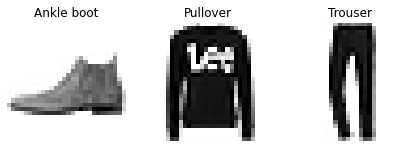

In [54]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [55]:
# 데이터 load, split, scaling하기

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

회귀용 MLP를 구축, 훈련, 평가, 예측하는 방법은 분류와 비슷

#### 분류와의 차이점
- 회귀는 출력층이 활성화 함수가 없는 하나의 뉴런을 가짐(하나의 값을 예측하기 때문)
- 손실 함수로 평균 제곱 오차를 사용

In [57]:
# 이 데이터에는 노이즈가 많기 때문에 과대적합을 막는 용도로 뉴런 수가 적은 은닉층 하나만 사용

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
 29/363 [=>............................] - ETA: 1s - loss: 3.3408 

2022-08-25 13:23:08.815114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


359/363 [============================>.] - ETA: 0s - loss: 1.6506

2022-08-25 13:23:10.232420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4875 - val_loss: 0.4656
Epoch 11/2

2022-08-25 13:23:41.292751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


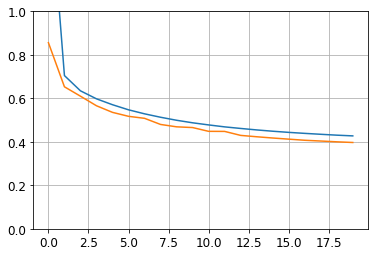

In [58]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

시퀀셜 API는 사용하기 쉬움. 하지만 입력과 출력이 여러 개거나 더 복잡한 네트워크 토폴로지(연결)를 갖는 신경망을 만들어야 할 때가 있음 -> 이를 위해 케라스는 `함수형(functional) API`를 제공함

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

순차적이지 않은 신경망의 한 예는 Wide & Deep 신경망 = wide models + deep models = MLP에 `입력 데이터의 일부 또는 전체데이터가 출력층에 바로 연결되는 부분이 추가됨` -> 이 신경망은 깊게 쌓은 층(deep)을 사용한 복잡한 패턴과 짧은 경로(wide)를 사용한 간단한 규칙을 모두 학습할 수 있음

일반적인 MLP는 층 전체에 모든 데이터를 통과시킴. 따라서 데이터에 있는 간단한 패턴이 연속된 변환으로 인해 왜곡될 수 있음.

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
# Input 객체 생성(input() 함수와 이름이 겹치지 않게 input_으로 만듦)
# 이 객체는 shape과 dtype을 포함하여 모델의 입력을 정의함
# 한 모델은 여러 개의 입력을 가질 수 있음
input_ = keras.layers.Input(shape=X_train.shape[1:])


# 이 층은 만들어지자마자 입력과 함께 함수처럼 호출됨 -> 그래서 함수형 API라고 부름
# (파이썬에는 객체를 함수처럼 호출하면 실행되는 특수한 __call__() 메서드가 있음
# -> __call__() 메서드에서 build() 메서드를 호출하여 층의 가중치를 생성함)
# 케라스에 층이 연결될 방법을 알려주었을 뿐 아직 어떤 데이터도 처리하지 않음
hidden1 = keras.layers.Dense(30, activation="relu")(input_)


# 두 번째 은닉층을 만들고 함수처럼 호출
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)


# concat 층은 input_과 연결(짧은 경로겠지)되고 hidden2와도 연결(긴 경로겠지)됨
# keras.layers.concatenate() 함수를 사용할 수도 있음
concat = keras.layers.concatenate([input_, hidden2]) # concatenate: 연결시키다



output = keras.layers.Dense(1)(concat)


# 사용할 입력과 출력을 지정하여 모델을 만듦
model = keras.models.Model(inputs=[input_], outputs=[output])

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 30)           930         ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_10[0][0]']           

In [62]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
 26/363 [=>............................] - ETA: 1s - loss: 3.4891 

2022-08-25 13:23:41.676915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.2611

2022-08-25 13:23:43.387162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4659 - val_loss: 0.4313
Epoch 11/2

2022-08-25 13:24:18.378421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [63]:
# 위 모델에서 5개의 특성(index 0~4)을 짧은 경로로 보내고
# 6개의 특성(index 2~7)은 깊은 경로로 보낸다고 가정
# 3개의 특성은 양쪽 경로로 감
# 이런 경우 여러 입력을 사용하면 됨

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, # model의 inputs이 두 개니까 튜플로 두 개의 inputs를 전달(딕셔너리로 이름과 함께 전달할 수도 있음)
                    validation_data=((X_valid_A, X_valid_B), y_valid)) # validation_data도 마찬가지
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
 23/363 [>.............................] - ETA: 1s - loss: 4.8831 

2022-08-25 13:24:18.651335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.7643

2022-08-25 13:24:20.451722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 6ms/step - loss: 1.7643 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7584 - val_loss: 0.6710
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6584 - val_loss: 0.6169
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6023 - val_loss: 0.5710
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5663 - val_loss: 0.5420
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5380 - val_loss: 0.5176
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5187 - val_loss: 0.5065
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5025 - val_loss: 0.4790
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4889 - val_loss: 0.4564
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4781 - val_loss: 0.4451
Epoch 11/2

2022-08-25 13:24:56.589117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


#### 여러 개의 출력이 필요한 경우도 많음
- 여러 출력이 필요한 작업일 경우
    - 예) 그림에 있는 주요 물체를 분류(분류)하고 위치(회귀)를 알아야 할 경우
- 동일한 데이터에서 독립적인 여러 작업을 수행할 경우
    - 작업마다 새로운 신경망을 훈련할 수 있지만, 하나의 출력을 가진 단일 신경망을 훈련하는 것이 보통 더 나은 결과를 냄
    - 왜? 신경망이 여러 작업에 걸쳐 유용한 특성을 학습할 수 있기 때문
        - 예) 얼굴 사진으로 다중 작업 분류(한 출력 - 얼굴 표정, 다른 출력 - 안경 유무)
- 규제 기법으로 사용하는 경우(과대적합을 줄이고 모델의 일반화 성능을 높이기 위해 훈련에 제약을 가함)
    - 예) 신경망 구조 안에 보조 출력을 추가(보조 출력을 사용해 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한 것을 학습하는 지 확인할 수 있음 = 중간중간 출력을 확인해보기(중간 점검 느낌))

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # hidden2에서 보조 출력해보기
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [67]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# 각 출력(메인 출력이든 보조 출력이든)은 자신만의 손실 함수가 필요
# 손실 함수 리스트를 전달하면 됨
# 케라스는 모든 손실을 더해 최종 손실을 구하고 이를 훈련에 사용함
# 따라서 보조 출력보다 주 출력에 더 관심이 많다면 주 출력에 더 많은 가중치를 부여하면 됨

In [68]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
# [y_train, y_train]: 각 출력에 대한 레이블(여기서는 주 출력과 보조 출력이 같은 것을 예측하므로 동일한 레이블 사용한 것)

Epoch 1/20
  8/363 [..............................] - ETA: 2s - loss: 6.1189 - main_output_loss: 6.2196 - aux_output_loss: 5.2124  

2022-08-25 13:24:57.038489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890

2022-08-25 13:24:59.671341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 8ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss: 1.2177 - 

In [69]:
# 총 손실, 주 손실, 보조 손실
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

# 주 출력에 대한 예측, 보조 출력에 대한 예측
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 48ms/step


2022-08-25 13:25:55.459054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### 10.2.5 서브클래싱 API로 동적 모델 만들기

시퀀셜 API와 함수형 API는 모두 선언적(declarative) -> 사용할 층과 연결 방식을 먼저 정의해야 함 -> 그다음 모델에 데이터를 주입하여 훈련이나 추론을 시작할 수 있음
- 이러한 방식의 장점
    - 모델 저장, 복사, 공유 쉬움
    - 모델의 구조를 출력하거나 분석하기 좋음
    - 크기를 짐작하고 타입을 확인하여 에러를 일찍 발견할 수 있음
    - 정적 그래프이므로 디버깅하기도 쉬움
- 하지만 정적이라는 것이 단점이 되기도 함
    - 어떤 모델은 반복문을 포함하고
    - 다양한 크기를 다루어야 하며
    - 조건문을 가지는 등 여러 동적인 구조를 필요로 함
    #### 이런 경우에 조금 더 명령형(imperative) 프로그래밍 스타일이 필요하다면 `서브클래싱 API`가 정답임
        - 간단히 Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만듦. 그다음 call() 메서드 안에 수행하려는 연산을 기술

---

#### 서브클래싱 API의 단점
- 유연성이 높아지면서 그에 따른 비용이 발생
    - 모델 구조가 call() 메서드 안에 숨겨져 있기 때문에 이를 케라스가 쉽게 분석할 수 없음. 즉 모델을 저장하거나 복사할 수 없음
    - summary() 메서드를 호출하면 층의 목록만 나열되고 층 간의 연결 정보를 얻을 수 없음
    - 또한 케라스가 타입과 크기를 미리 확인할 수 없어 실수가 발생하기 쉬움
    - 높은 유연성이 필요하지 않다면 시퀀셜 API나 함수형 API를 사용하는 것이 좋음

In [73]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# 위 예제는 함수형 API와 비슷하지만 Input 클래스의 객체를 만들 필요가 없음
# 대신 call() 메서드의 input 매개변수를 사용
    
    
    
model = WideAndDeepModel(30, activation="relu")

In [75]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
  8/363 [..............................] - ETA: 2s - loss: 5.3782 - output_1_loss: 5.4715 - output_2_loss: 4.5384  

2022-08-25 13:34:14.924731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304

2022-08-25 13:34:17.695737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 4s 9ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 3s 8ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 3s 8ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 3s 8ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 3s 8ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_output_2_lo

2022-08-25 13:34:44.488279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [76]:
model.summary() # 층 간의 연결 정보를 알 수 없음

Model: "wide_and_deep_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            multiple                  210       
                                                                 
 dense_21 (Dense)            multiple                  930       
                                                                 
 dense_22 (Dense)            multiple                  36        
                                                                 
 dense_23 (Dense)            multiple                  31        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


### 10.2.6 모델 저장과 복원

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [79]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
 24/363 [>.............................] - ETA: 1s - loss: 6.2442 

2022-08-25 13:46:47.542846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


358/363 [============================>.] - ETA: 0s - loss: 1.9018

2022-08-25 13:46:49.232056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 3ms/step - loss: 0.4382


In [80]:
model.save('my_keras_model.h5') # HDF5 포맷
# 모든 층의 하이퍼파라미터 + 모델 구조 + 층의 모든 모델 파라미터(연결 가중치와 편향) + 옵티마이저 저장

# 일반적으로 하나의 파이썬 스크립트에서 모델을 훈련하고 저장한 다음 하나 이상의 스크립트 또는 웹 서비스에서
# 모델을 로드하고 예측을 만드는 데 활용함

# 시퀀셜 API와 함수형 API에서는 이러한 방식을 사용 가능
# 서브클래싱에서는 사용 불가 -> save_weights()와 load_weights() 메서드를 사용해 모델 파라미터를 저장하고 복원할 수 있음
# 그 외에는 모두 수동으로 저장하고 복원해야 함

In [81]:
model = keras.models.load_model('my_keras_model.h5') # 모델 불러오기

In [82]:
model.predict(X_new)

1/1 [==============================] - 0s 40ms/step


2022-08-25 13:50:58.453779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [83]:
model.save_weights('my_keras_weights.ckpt')

In [84]:
model.load_weights('my_keras_weights.ckpt')

### 10.2.7 콜백 사용하기

훈련이 몇 시간 동안 지속되는 경우? -> 훈련 마지막에 모델을 저장하는 것뿐만 아니라 훈련 도중 일정 간격으로 체크포인트를 저장해야 함
- 체크포인트: 텐서플로에서 모델 파라미터를 저장하는 포맷

-> 어떻게 fit() 메서드에서 체크포인트를 저장? -> 콜백 사용

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [87]:
# fit() 메서드의 callbacks 매개변수를 사용해 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 저장할 수 있음
# 또는 에포크의 시작, 끝, 각 배치 처리 전후에 호출할 수도 있음

# 아래에서 사용한 ModelCheckpoint는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장(기본적으로 매 에포크의 끝에서 호출됨)

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=12-3))

# 훈련하는 동안 검증 셋을 사용하면 save_best_only=True로 지정 가능 -> 최상의 검증 셋 점수에서만 모델을 저장함 -> 과대적합 걱정할 필요 없음
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

# 검증 셋 점수가 제일 높은 모델이 복원되겠지
model = keras.models.load_model('my_keras_model.h5')

mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
 24/363 [>.............................] - ETA: 1s - loss: nan                                  

2022-08-25 14:01:58.123475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


361/363 [============================>.] - ETA: 0s - loss: nan

2022-08-25 14:01:59.910990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 10/10
 54/162 [=========>....................] - ETA: 0s - loss: 0.4705

2022-08-25 14:02:16.568079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


162/162 [==============================] - 1s 3ms/step - loss: 0.4382


In [89]:
# EarlyStopping 콜백: 조기 종료 구현. 일정 에포크(patience) 동안 검증 셋에 대한 점수가 향상되지 않으면 훈련을 멈춤
# keras.callbacks 패키지에는 다른 종류의 콜백이 많음

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
 23/363 [>.............................] - ETA: 1s - loss: 0.5196 

2022-08-25 14:20:49.112400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3976 - val_loss: 0.3723
E

363/363 [==============================] - 2s 5ms/step - loss: 0.3324 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3320 - val_loss: 0.3166
Epoch 83/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3317 - val_loss: 0.3278
Epoch 84/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3312 - val_loss: 0.3637
Epoch 85/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3310 - val_loss: 0.3175
Epoch 86/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3305 - val_loss: 0.3524
Epoch 88/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3299 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3294 - val_loss: 0.3625
Epoch 90/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3296 - val_loss: 

In [90]:
# 더 많은 제어를 원한다면 사용자 정의 콜백을 만들 수 있음

# 예시) 아래 콜백은 훈련하는 동안 검증 손실과 훈련 손실의 비율을 출력

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [91]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

358/363 [============================>.] - ETA: 0s - loss: 0.3297
val/train: 1.08
363/363 [==============================] - 2s 5ms/step - loss: 0.3302 - val_loss: 0.3556


### 10.2.8 텐서보드를 사용해 시각화하기

In [92]:
# 텐서보드: 인터렉티브 시각화 도구

# 텐서보드 서버가 루트 로그 디렉토리를 가리키고 프로그램은 실행할 때마다 다른 서브디렉토리에 이벤트를 기록
# 텐서보드 서버는 로그 디렉토리를 모니터링하고 자동으로 변경사항을 읽어 그래프를 업데이트함

import os
root_logdir = os.path.join(os.curdir, 'my_logs') # 루트 로그 디렉토리 정의

def get_run_logdir(): # 현재 날짜와 시간을 사용해 실행할 때마다 다른 서브디렉토리 경로를 생성하는 함수
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # 예) './my_logs/run_2019_06_07-15_15_22'
# 이름은 짓기 나름이겠지(하이퍼파라미터 값으로 지을수도 있고)
# 이렇게 이름을 지으면 텐서보드에서 어떤 로그인지 구분하기 편리하겠지

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [99]:
# TensorBoard() 콜백이 로그 디렉토리 생성 -> 훈련하는 동안 이벤트 파일을 만들고 서머리를 기록
# 실행할 때마다 하나의 디렉토리가 생성됨

# 훈련 로그는 프로파일링 트레이스(profiling trace) 파일도 포함함
# -> 텐서보드가 이 파일을 사용해 전체 디바이스에 걸쳐서 모델의 각 부분에서 시간이 얼마나 소요되었는지 보여줌

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3722 - val_loss: 0.4152
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3710 - val_loss: 0.4525
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3700 - val_loss: 0.4361
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3685 - val_loss: 0.4249
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3678 - val_loss: 0.4033
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3663 - val_loss: 0.4232
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3656 - val_loss: 0.4091
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3644 - val_loss: 0.3882
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3632 - val_loss: 0.4071
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3622 - val_loss: 0.4124

In [100]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

## 10.3 신경망 하이퍼파라미터 튜닝하기

In [105]:
# 은닉층의 개수, 뉴런의 개수, 그 외 여러 하이퍼파라미터 등을 어떻게 결정해야 할까?
# 신경망은 유연하다 = 조정할 하이퍼파라미터가 많다
# 간단한 다층 퍼셉트론에서도 층의 개수, 층마다 있는 뉴런의 개수, 각 층에서의 활성화 함수, 가중치 초기화 전략 등...

# 한 가지 방법은 여러 하이퍼파라미터 조합을 시도해보고 어떤 것이 검증 셋에서(또는 K-fold 교차검증에서) 가장 좋은 점수를 내는지 확인하는 것
# 예를 들어 GridSearchCV나 RandomizedSearchCV를 사용
# 이렇게 하려면 케라스 모델을 사이킷런 추정기처럼 보이도록 바꿔야 함

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [110]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# KerasRegressor 객체는 build_model() 함수로 만들어진 케라스 모델을 감싸는 간단한 waapper임
# 이제 일반 사이킷런 회귀 추정기처럼 이 객체를 사용할 수 있음
# fit() 메서드로 모델을 훈련하고 score() 메서드로 평가하고 predict() 메서드로 예측을 만들 수 있음

/var/folders/h4/qkygjbx150l41hr_cmr5wpt80000gn/T/ipykernel_8214/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [111]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
 26/363 [=>............................] - ETA: 1s - loss: 3.6218 

2022-08-25 15:58:20.625843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/363 [============================>.] - ETA: 0s - loss: 1.2082

2022-08-25 15:58:22.096205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.1971 - val_loss: 1.7696
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6045 - val_loss: 0.5361
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5203 - val_loss: 0.5093
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4783 - val_loss: 0.4392
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4524 - val_loss: 0.4161
Epoch 6/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4353 - val_loss: 0.4036
Epoch 7/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4249 - val_loss: 0.3930
Epoch 8/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4174 - val_loss: 0.3925
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4104 - val_loss: 0.3853
Epoch 10/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4056 - val_loss: 0.3835
E

In [112]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3422


In [113]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 37ms/step


2022-08-25 16:01:10.274148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [114]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 모델 하나를 훈련하고 평가하려는 것이 아니라 수백 개의 모델을 훈련하고 검증 셋에서 최상의 모델을 선택해야 함
# 하이퍼파라미터가 많으므로 그리드 탐색보단 랜덤 탐색이 좋음

# 아래는 은닉층 개수, 뉴런 개수, 학습률을 사용해 하이퍼파라미터 탐색 수행

from scipy.stats import reciprocal # 역수
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100).tolist(),
    'learning_rate': reciprocal(3e-4, 3e-3).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# RandomizedSearchCV는 K-fold 교차 검증을 사용하기 때문에 validation set을 사용하지 않음
# 아래 validation_data는 조기 종료에만 사용됨
# 아래와 같이 래퍼로 감싸진 케라스 모델에 전달할 추가적인 매개변수가 fit() 메서드에 있는 것을 제외하고는 2장에서 한 것과 동일
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

랜덤 탐색은 어렵지 않으며 간단한 문제에서 잘 작동함

하지만 훈련 시간이 길면 탐색 과정을 수동으로 보조하여 이 문제를 부분적으로 완화할 수 있음

하이퍼 파라미터 값의 범위를 크게 하여 빠르게 첫 번째 랜덤 탐색을 수행하고, 첫 번째 탐색에서 찾은 최상의 하이퍼파라미터 값을 중심으로 좁은 밤위를 탐색 -> 반복 -> 하지만 이 방법은 시간이 많이 소요되며 최상의 방법은 아닐 것임

- 훨씬 더 효율적으로 하이퍼파라미터 공간을 탐색하는 여러 기법(아이디어: 탐색 지역이 좋다고 판명될 때 더 탐색을 수행함 -> 수동으로 탐색 영역을 좁혔던 작업을 대신 관리하여 훨씬 적은 시간에 더 나은 솔루션을 만들 수 있음)
#### 하이퍼파라미터 최적화에 사용할 수 있는 몇 개의 파이썬 라이브러리
    - Hyperopt
    - Hyperas, kopt, Talos
    - Keras Tuner
    - Scikit-Optimize(skopt)
    - Spearmint
    - Hyperband
    - Sklearn-Deap

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

### 10. 3. 1 은닉층 개수

이론적으로는 은닝층이 하나인 다층 퍼셉트론이더라도 뉴런 개수가 충분하다면 아주 복잡한 함수도 모델링할 수 있음

하지만 복잡한 함수를 모델링하는 데 심층 신경망이 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용함 -> 심층 신경망의 파라미터 효율성이 훨씬 좋음 -> 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있음

왜? 예를 들어 숲을 그린다고 했을 때
- 얕은 신경망: 복붙 기능 없이 숲을 그림
- 심층 신경망: 잎과 가지를 복붙해 나무를 그리고, 나무를 복붙해서 숲을 그림 -> 실제 데이터는 이런 계층 구조를 가진 경우가 많으므로 심층 신경망은 이런 면에서 유리함
    - 아래쪽 은닉층: 저수준의 구조를 모델링(예를 들어 선)
    - 중간 은닉층: 저수준의 구조를 연결해 중간 수준의 구조를 모델링(선을 연결한 삼각형, 사각형)
    - 가장 위쪽 은닉층과 출력층: 중간 수준의 구조를 연결해 고수준의 모델을 모델링(여러 모양을 연결한 얼굴)
    
    - 심층 신경망은 새로운 데이터에 일반화되는 능력도 향상시켜줌
        - 예를 들어 사진에서 얼굴을 인식하는 모델을 훈련한 후, 헤어스타일을 인식하는 새로운 신경망을 새로 훈련하려면 첫 번째 네트워크의 하위 층을 재사용하여 훈련을 시작할 수 있음
        - 이런 방식을 사용하면 대부분의 사진에 나타나는 저수준 구조를 학습할 필요가 없게 됨(즉 고수준 구조만 학습하면 됨) -> 이를 `전이학습(transfer learning)`이라고 함

---

요약하면 하나 또는 두 개의 은닉층만으로도 많은 문제를 꽤 잘 해결할 것(MNIST 데이터셋에서는 몇백 개의 뉴런을 가진 은닉층 하나로 97% 이상의 정확도를 얻을 수 있음)

대규모 이미지 분류나 음성 인식같이 매우 복잡한 작업에서는 일반적으로 수십, 수백 개 층으로 이루어진 네트워크가 필요함. 그리고 훈련 데이터가 아주 많이 필요함. -> 하지만 이런 네트워크를 처음부터 훈련하는 경우는 드묾 -> 비슷한 작업에서 가장 뛰어난 성능을 낸 미리 훈련된 네트워크 일부를 재사용하는 것이 일반적임 -> 이는 속도도 훨씬 빠르고 데이터도 훨씬 적게 필요함

### 10.3.2 은닉층의 뉴런 개수

입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정됨
- MNIST의 입력층: 28*28=784개의 입력 뉴런 필요
- MNIST의 출력층: 10개(0~9)의 출력 뉴런 필요

은닉층의 구성 방식: 일반적으로 각 층의 뉴런을 점점 줄여서 깔대기처럼 구성함 -> 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문

하지만 이 구성은 요즘엔 일반적이지 않음. 대부분의 경우 모든 은닉층에 같은 크기를 사용해도 동일하거나 더 나은 성능을 나타냄. 또한 튜닝할 하이퍼파라미터가 층마다 한 개씩이 아니라 전체를 통틀어 한 개가 됨. 데이터셋에 따라 다르지만 다른 은닉층보다 첫 번째 은닉층을 크게 하는 것이 도움이 됨.

층의 개수와 마찬가지로 네트워크가 과대적합이 시작되기 전까지 점진적으로 뉴런 수를 늘릴 수 있음. 하지만 실전에서는 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 간단하고 효과적임

한 층의 뉴런 수가 너무 적으면 입력에 있는 유용한 정보를 모두 유지하기 위한 충분한 표현 능력을 가지지 못함(예를 들어 뉴런 두 개를 가진 층은 2D 데이터만 출력할 수 있음. 만약 3D 데이터를 처리한다면 일부 정보를 잃고 나머지 층이 어떻든 정보는 복원되지 않음)

##### 일반적으로 층의 뉴런 수보다 층 수를 늘리는 쪽이 이득이 많음

### 10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

- 학습률
    - 일반적으로 최적의 학습률은 최대 학습률(훈련 알고리즘이 발산하는 학습률)의 절반 정도
    - 좋은 학습률을 찾는 한 가지 방법: 매우 낮은 학습률에서 시작해 점진적으로 매우 큰 학습률까지 수백 번 반복하여 모델을 훈련하는 것
    - 최적의 학습률은 다른 하이퍼파라미터에 의존적임. 특히 배치 크기에 영향을 많이 받음. 따라서 다른 하이퍼파라미터를 수정하면 학습률도 반드시 튜닝해야 함
- 옵티마이저
- 배치 크기
    - 배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있음
    - 큰 배치 크기 사용의 장점: GPU와 같은 하드웨어 가속기를 효율적으로 활용할 수 있음
    - 실전에서 큰 배치 크기를 사용하면 훈련 초기에 종종 불안정하게 훈련됨(결과 모델은 작은 배치 크기로 훈련된 모델만큼 일반화 성능을 내지 못할 수 있음)
    - 작은 배치 크기는 2 ~ 32
- 활성화 함수
    - 일반적으로 ReLU 활성화 함수가 모든 은닉층에 좋은 기본값. 출력층의 활성화 함수는 수행하는 작업에 따라 달라짐
- 반복 횟수
    - 대부분 반복 횟수는 튜닝하지 않음. 대신 조기 종료를 사용함